# House Prices - Advanced Regression Techniques

Predict sales prices and practice feature engineering, RFs, and gradient boosting  
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

### Preamble

In [30]:
import pandas as pd

### Load CSVs and show their description

In [31]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

In [32]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [33]:
quantitative = [f for f in train.columns if train.dtypes[f] != "object"]
quantitative.remove("SalePrice")
quantitative.remove("Id")

qualitative = [f for f in train.columns if train.dtypes[f] == "object"]

### Graphics

- SalePrice は正規分布ではない

<Axes: xlabel='SalePrice', ylabel='Count'>

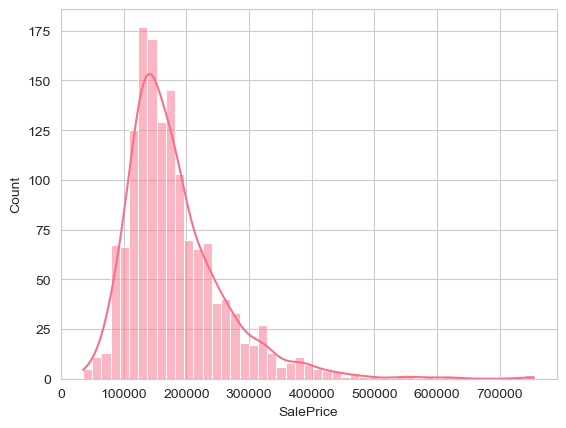

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

sns.histplot(data=train, x="SalePrice", kde=True)

In [65]:
for attr in qualitative:
    train[attr] = train[attr].astype("category")
    if train[attr].isnull().any():
        train[attr] = train[attr].cat.add_categories(["MISSING"])
        train[attr] = train[attr].fillna("MISSING")


def f(x, y, **kwargs):
    sns.boxplot(x=x, y=y, hue=x, legend=False, palette="deep") # type: ignore
    x = plt.xticks(rotation=90)


# sns.FacetGrid(
#     pd.melt(train, id_vars=["SalePrice"], value_vars=qualitative),
#     col="variable", col_wrap=6, sharex=False, sharey=False,
#     height=3, aspect=1
# ).map(f, "value", "SalePrice")

![facetgrid](./facetgrid.png)